In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
import missingno as msno

from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

import scipy.stats as stats

# Первичная обработка набора данных

> Используем датасет [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot). Набор данных содержит список домов в Мелбурне, выставленных на продажу. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Aiplane_BlueBook.csv')
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


# Устранение пропусков в данных

In [ ]:
print(data.info())
data.describe(include = ['int', 'object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    861 non-null    object 
 1   Company                  861 non-null    object 
 2   Engine Type              834 non-null    object 
 3   HP or lbs thr ea engine  834 non-null    object 
 4   Max speed Knots          791 non-null    object 
 5   Rcmnd cruise Knots       811 non-null    object 
 6   Stall Knots dirty        735 non-null    object 
 7   Fuel gal/lbs             807 non-null    float64
 8   All eng service ceiling  780 non-null    float64
 9   Eng out service ceiling  332 non-null    object 
 10  All eng rate of climb    752 non-null    object 
 11  Eng out rate of climb    358 non-null    object 
 12  Takeoff over 50ft        712 non-null    float64
 13  Takeoff ground run       691 non-null    float64
 14  Landing over 50ft        7

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Eng out service ceiling,All eng rate of climb,Eng out rate of climb,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
count,861,861,834,834,791,811,735,332,752,358,830,834,822,819,832,758
unique,858,67,9,173,267,255,74,184,345,212,312,641,253,162,208,433
top,Lineage 1000,Cessna Aircraft Company,Piston,300,122,459,50,26000,1000,240,3600,NC,Orig,Orig,35/10,550
freq,2,204,578,55,14,15,46,13,15,12,31,11,33,33,36,11


In [ ]:
data.isna().sum()/861*100

Model                       0.000000
Company                     0.000000
Engine Type                 3.135889
HP or lbs thr ea engine     3.135889
Max speed Knots             8.130081
Rcmnd cruise Knots          5.807201
Stall Knots dirty          14.634146
Fuel gal/lbs                6.271777
All eng service ceiling     9.407666
Eng out service ceiling    61.440186
All eng rate of climb      12.659698
Eng out rate of climb      58.420441
Takeoff over 50ft          17.305459
Takeoff ground run         19.744483
Landing over 50ft          17.305459
Landing ground roll        23.344948
Gross weight lbs            3.600465
Empty weight lbs            3.135889
Length ft/in                4.529617
Height ft/in                4.878049
Wing span ft/in             3.368177
Range N.M.                 11.962834
dtype: float64

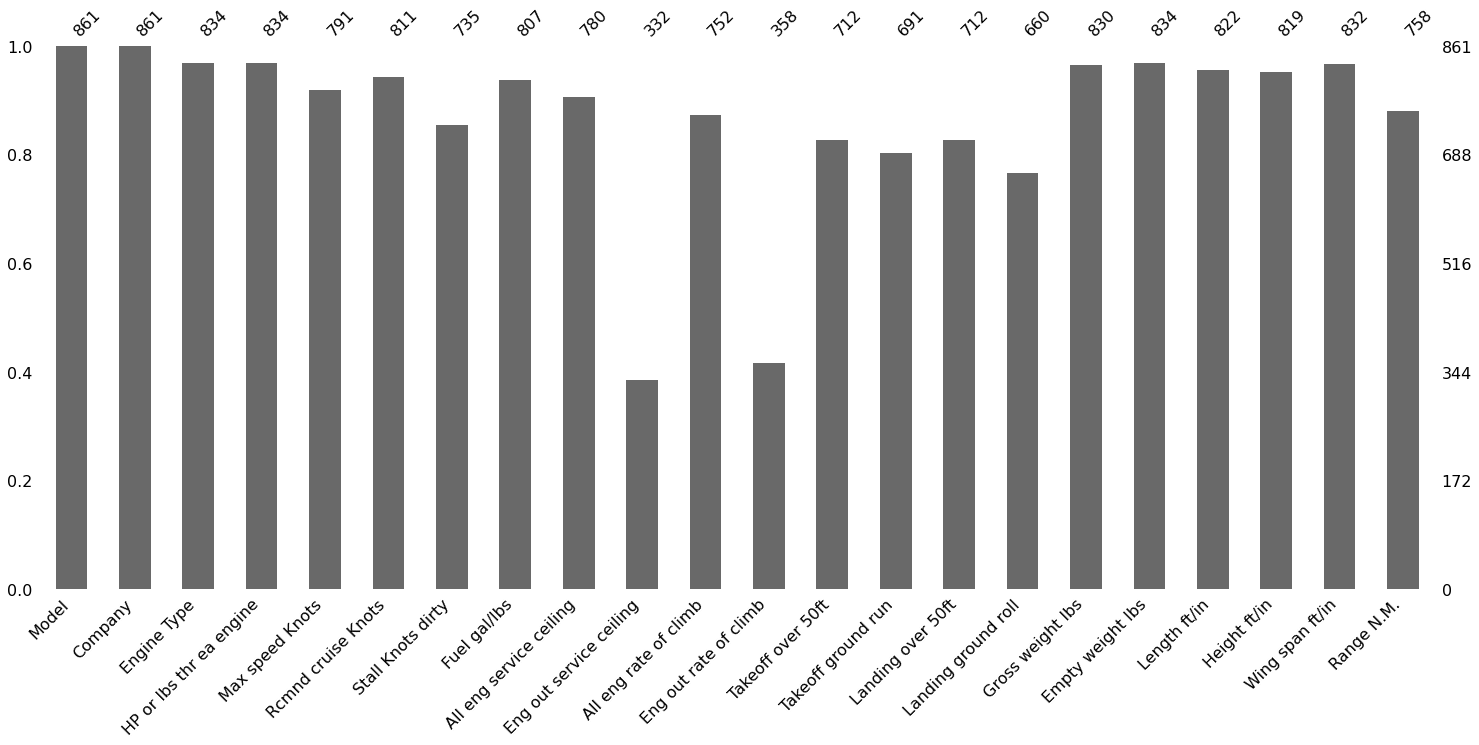

In [ ]:
msno.bar(data)

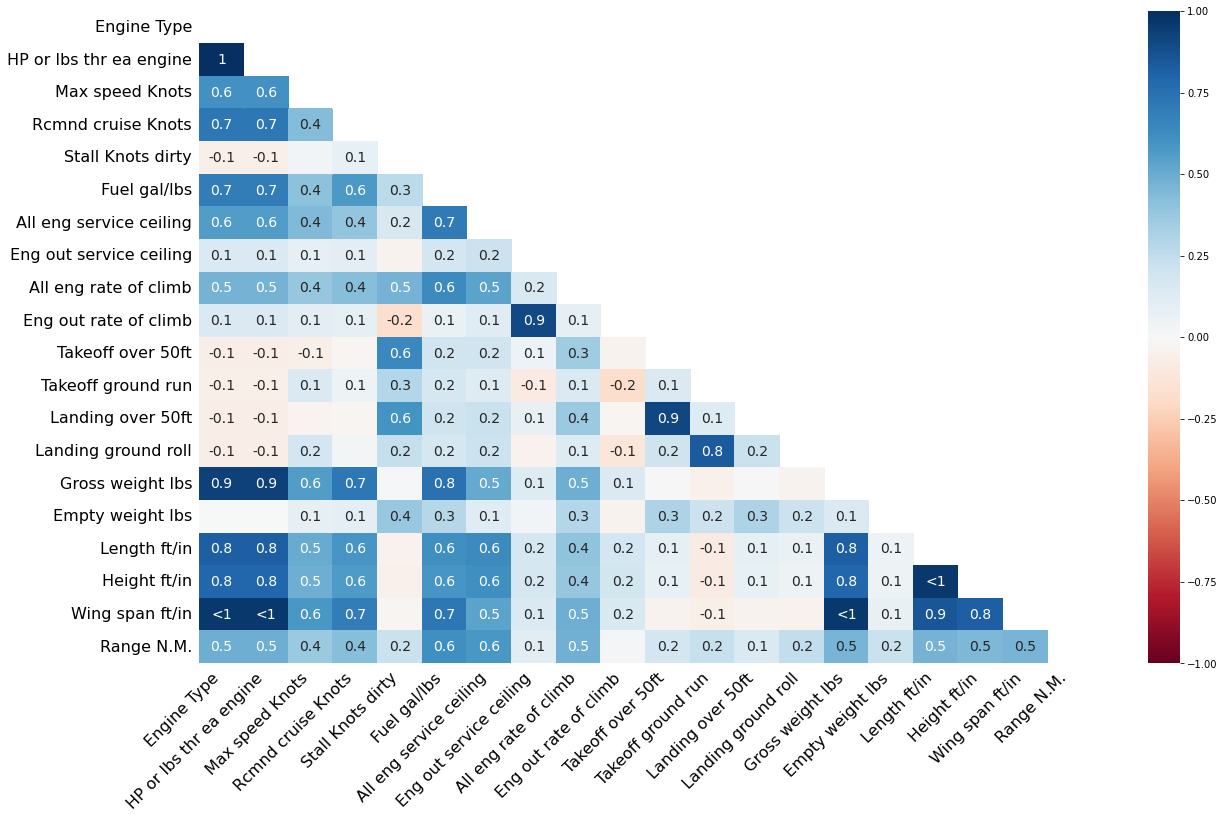

In [ ]:
msno.heatmap(data)

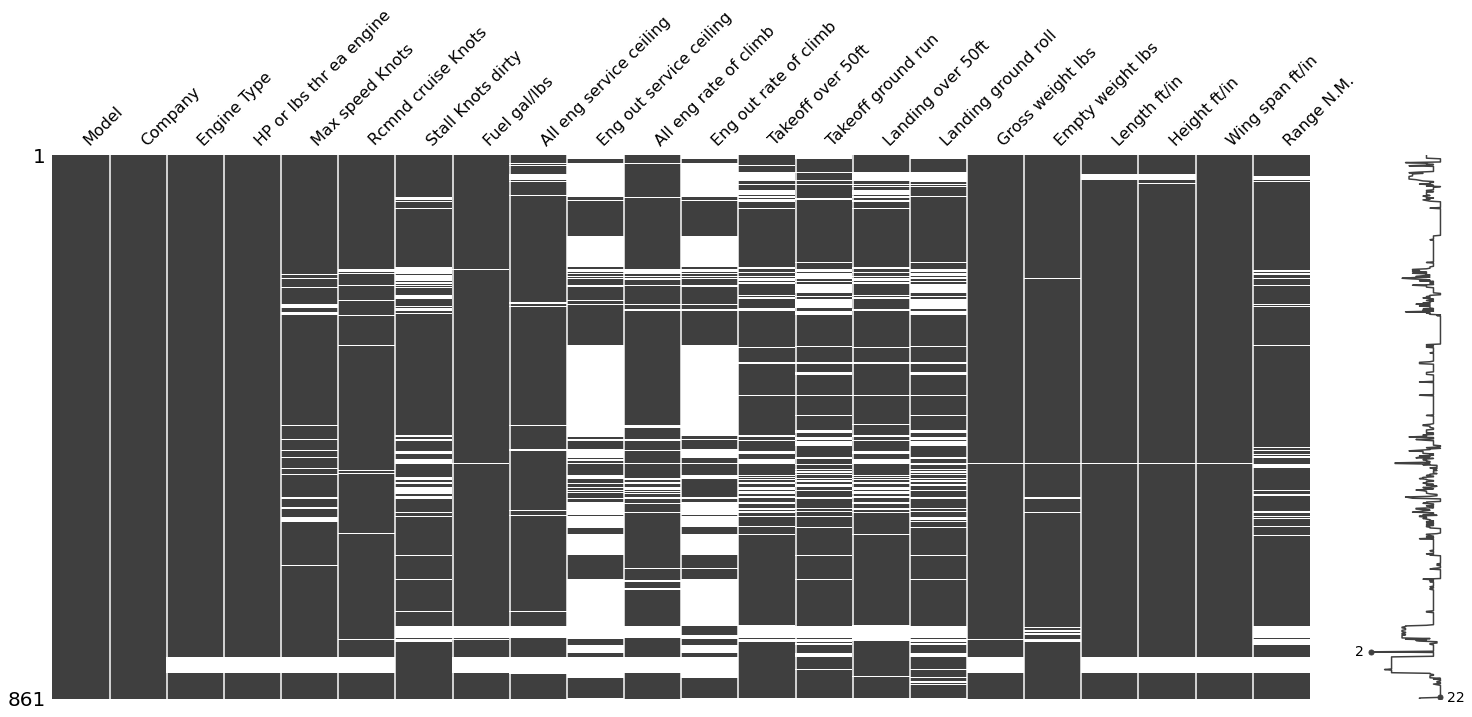

In [ ]:
msno.matrix(data)

## Удаление пропущенных значений

Анализ набора данных показал, что прежде всего логичнее будет удалить строки, в которых наблюдается большое число пропущенных значений. Это можно сделать прежде всего выделением тех колонок, в которых это встречается.

In [ ]:
cols_with_rows_to_drop = ['Engine Type', 'Fuel gal/lbs', 'Length ft/in']

In [ ]:
data_cleaned = data.dropna(subset = cols_with_rows_to_drop)

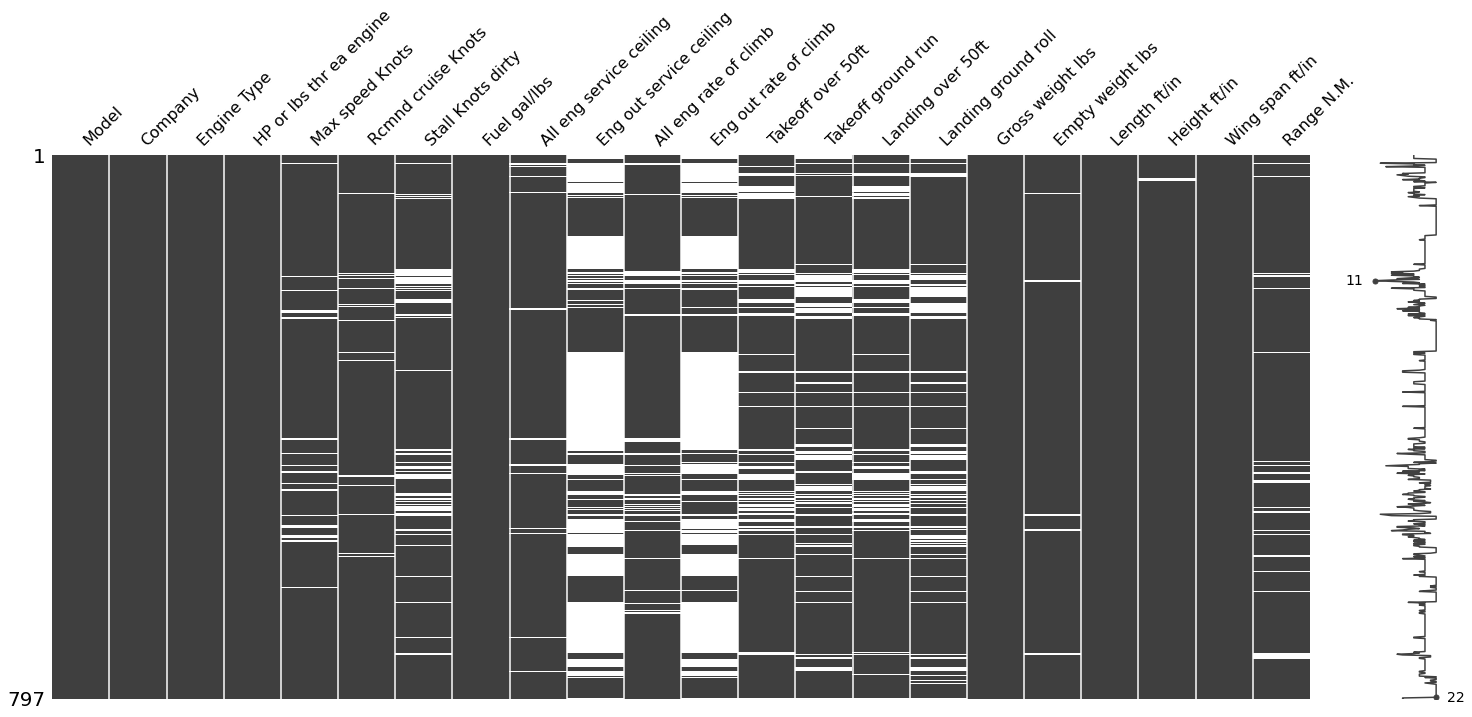

In [ ]:
msno.matrix(data_cleaned)

Также уберем две колонки, в которых наблюдается избыточное число пропусков:

In [ ]:
data_cleaned = data_cleaned.drop(axis = 1, labels = ['Eng out service ceiling', 'Eng out rate of climb'])

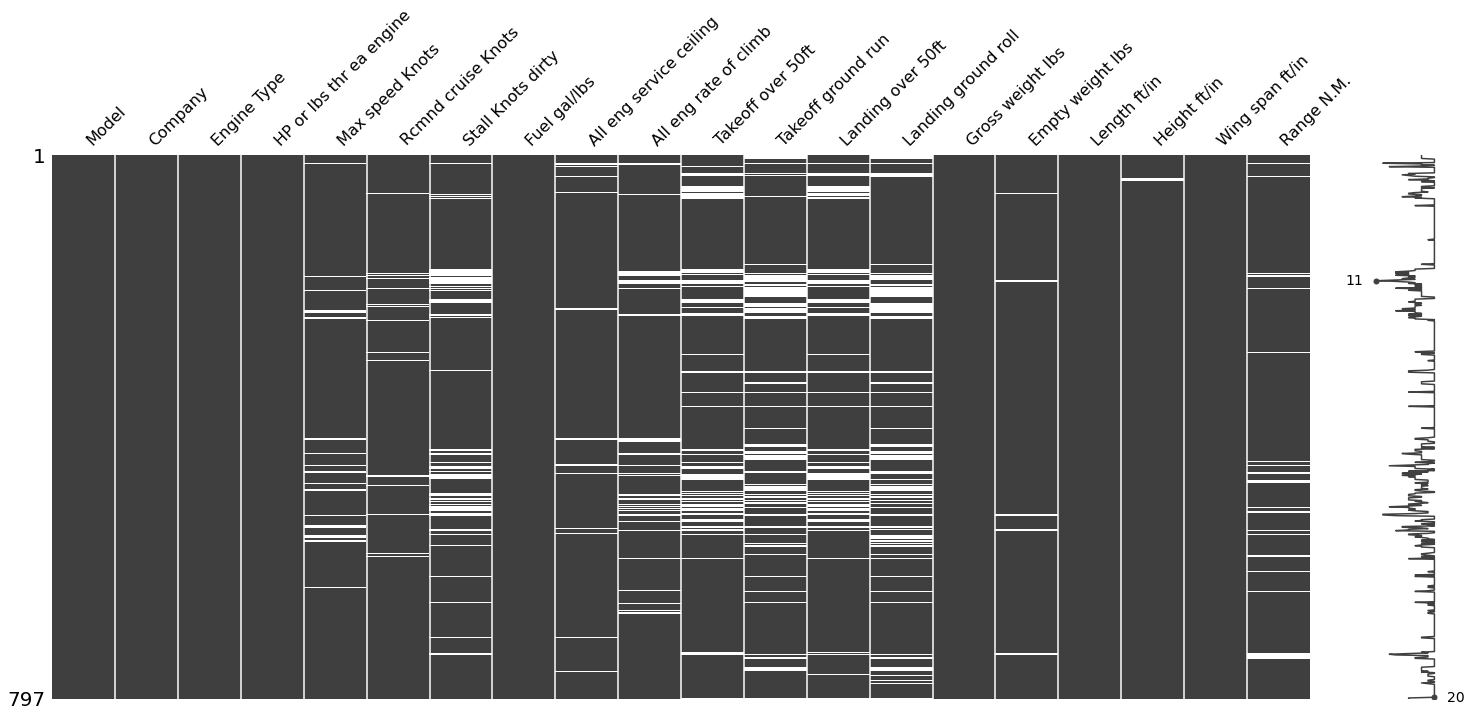

In [ ]:
msno.matrix(data_cleaned)

In [ ]:
drop_data = {}
for i in range (0, 21):
  drop_data[i] = data.dropna(axis = 0, thresh = i).shape[0]
print(drop_data)

{0: 861, 1: 861, 2: 861, 3: 860, 4: 860, 5: 860, 6: 860, 7: 859, 8: 859, 9: 834, 10: 832, 11: 832, 12: 819, 13: 807, 14: 797, 15: 784, 16: 775, 17: 753, 18: 724, 19: 636, 20: 562}


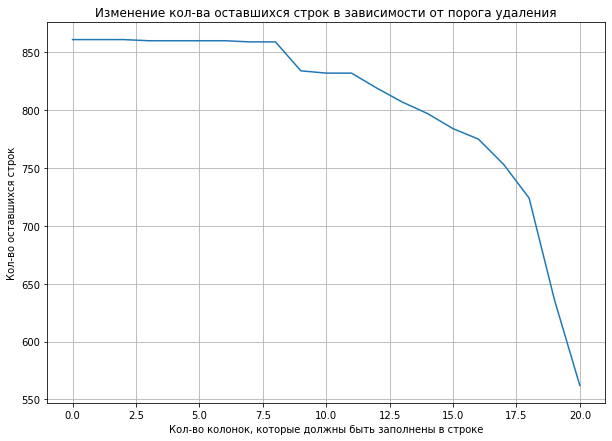

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(range(len(drop_data)), list(drop_data.values()))
plt.ylabel('Кол-во оставшихся строк')
plt.xlabel('Кол-во колонок, которые должны быть заполнены в строке')
plt.title('Изменение кол-ва оставшихся строк в зависимости от порога удаления')
plt.grid()

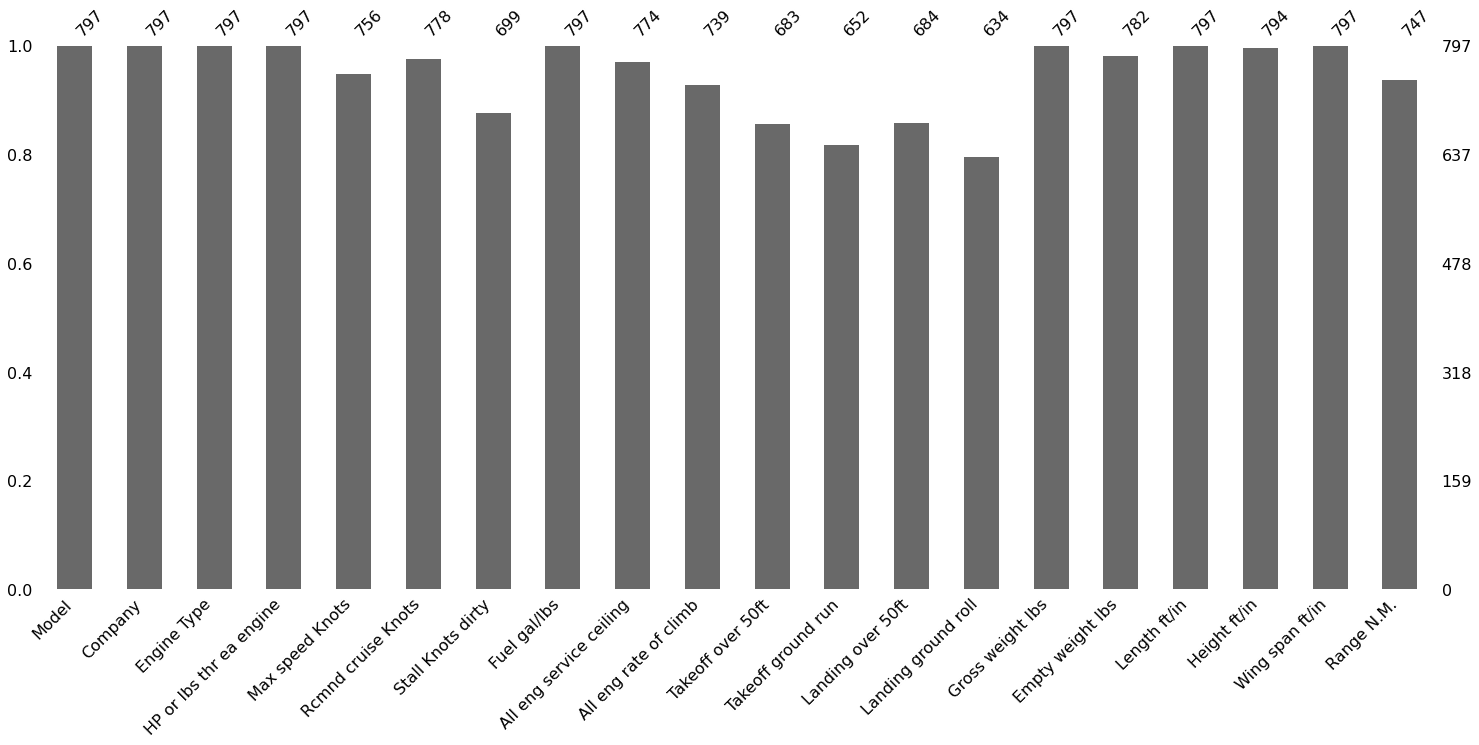

In [ ]:
msno.bar(data_cleaned)

In [ ]:
# Колонки с пропусками
cols_with_na = [c for c in data_cleaned.columns if data_cleaned[c].isnull().sum() > 0]
cols_with_na

['Max speed Knots',
 'Rcmnd cruise Knots',
 'Stall Knots dirty',
 'All eng service ceiling',
 'All eng rate of climb',
 'Takeoff over 50ft',
 'Takeoff ground run',
 'Landing over 50ft',
 'Landing ground roll',
 'Empty weight lbs',
 'Height ft/in',
 'Range N.M.']

In [ ]:
for col in cols_with_na:
   print(data_cleaned[col].dtype)

object
object
object
float64
object
float64
float64
float64
float64
object
object
object


In [ ]:
cols_to_impute = []
cols_to_delete = []
for col in cols_with_na:
  try:
    data_cleaned[col] = data_cleaned[col].astype(float)
    print(f'{col} : Success')
    cols_to_impute.append(col)
  except Exception as e:
    print(f'{col} : {repr(e)}')
    cols_to_delete.append(col)
    continue

Max speed Knots : ValueError("could not convert string to float: '.80 Mach'")
Rcmnd cruise Knots : ValueError("could not convert string to float: '.78 Mach'")
Stall Knots dirty : ValueError("could not convert string to float: '44kcas'")
All eng service ceiling : Success
All eng rate of climb : ValueError("could not convert string to float: '1,030 w/3bld'")
Takeoff over 50ft : Success
Takeoff ground run : Success
Landing over 50ft : Success
Landing ground roll : Success
Empty weight lbs : ValueError("could not convert string to float: '+22lb'")
Height ft/in : ValueError("could not convert string to float: '10/3'")
Range N.M. : ValueError("could not convert string to float: '1,000+'")


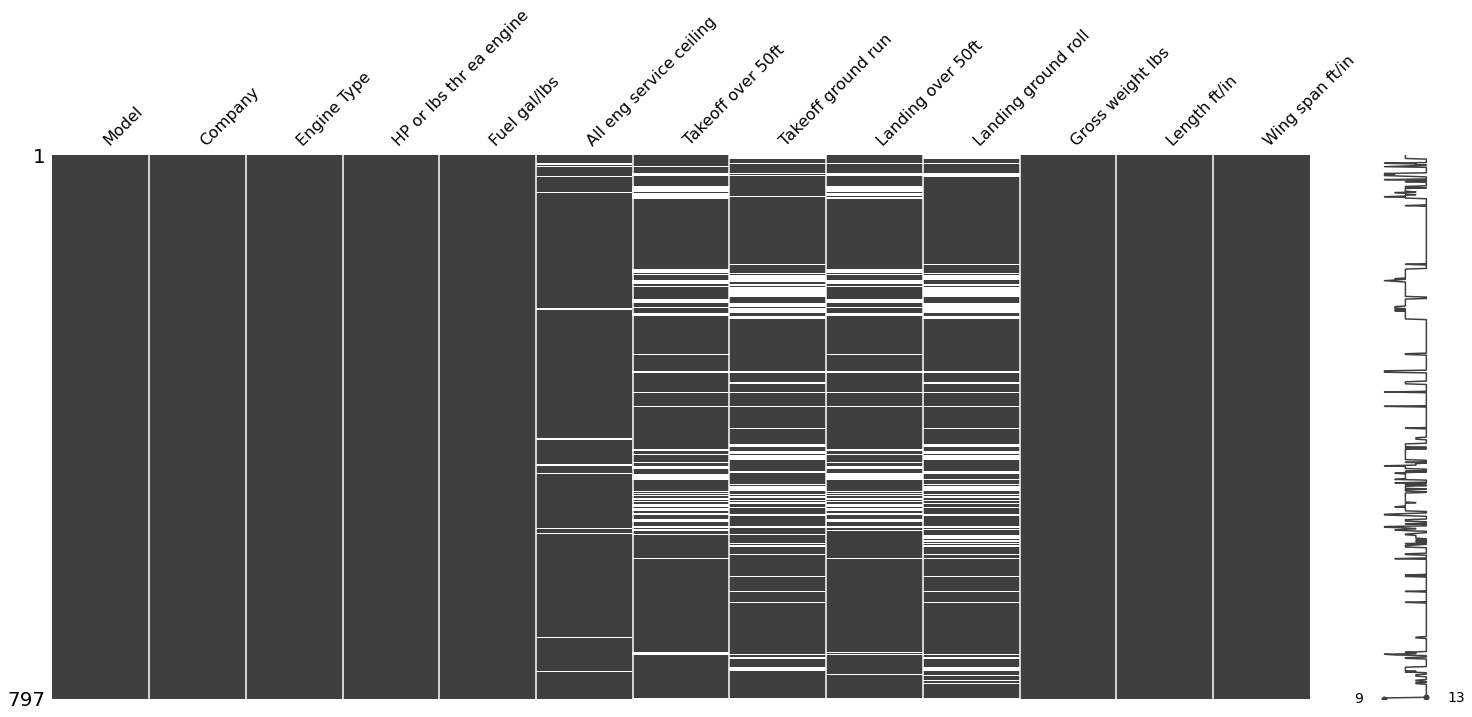

In [ ]:
data_cleaned_deleted = data_cleaned.drop(axis = 1, labels = cols_to_delete)
msno.matrix(data_cleaned_deleted)

In [ ]:
cols_to_leave_for_impute = []
cols_to_delete_from_impute = []
for col in data_cleaned.columns:
  try:
    data_cleaned[col] = data_cleaned[col].astype(float)
    print(f'{col} : Success')
    cols_to_leave_for_impute.append(col)
  except Exception as e:
    print(f'{col} : {repr(e)}')
    cols_to_delete_from_impute.append(col)
    continue

Model : ValueError("could not convert string to float: '15 AC Sedan'")
Company : ValueError("could not convert string to float: 'Aeronca'")
Engine Type : ValueError("could not convert string to float: 'Piston'")
HP or lbs thr ea engine : ValueError("could not convert string to float: '940wet'")
Max speed Knots : ValueError("could not convert string to float: '.80 Mach'")
Rcmnd cruise Knots : ValueError("could not convert string to float: '.78 Mach'")
Stall Knots dirty : ValueError("could not convert string to float: '44kcas'")
Fuel gal/lbs : Success
All eng service ceiling : Success
All eng rate of climb : ValueError("could not convert string to float: '1,030 w/3bld'")
Takeoff over 50ft : Success
Takeoff ground run : Success
Landing over 50ft : Success
Landing ground roll : Success
Gross weight lbs : ValueError("could not convert string to float: 'Orig'")
Empty weight lbs : ValueError("could not convert string to float: '+22lb'")
Length ft/in : ValueError("could not convert string to f

In [ ]:
data_cleaned['row_num'] = range(0, len(data_cleaned))

In [ ]:
cols_to_leave_for_impute.append('row_num')

In [ ]:
data_knn_impute = data_cleaned[cols_to_leave_for_impute].copy()
data_knn_impute.shape

(797, 7)

In [ ]:
knnimputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_data_imputed_temp = knnimputer.fit_transform(data_knn_impute)
knnimpute_data_imputed = pd.DataFrame(knnimpute_data_imputed_temp, columns=data_knn_impute.columns)
knnimpute_data_imputed.head()

,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,row_num
0,36.0,13000.0,900.0,1013.678850,1300.0,572.706741,0.0
1,15.0,12300.0,720.0,907.323545,800.0,537.637167,1.0
2,19.0,16000.0,475.0,1071.689468,850.0,634.209014,2.0
3,19.0,13000.0,500.0,1060.980507,850.0,672.914759,3.0
4,14.0,12500.0,632.0,990.702907,885.0,565.608815,4.0


In [ ]:
eng_df = pd.DataFrame({'original': data_cleaned['All eng service ceiling'].values})
eng_df['KNN_5'] = knnimpute_data_imputed['All eng service ceiling']

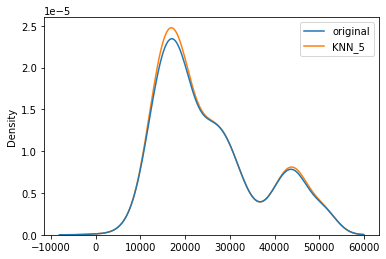

In [ ]:
sns.kdeplot(data = eng_df)

In [ ]:
land_df = pd.DataFrame({'original': data_cleaned['Landing ground roll'].values})
land_df['KNN_5'] = knnimpute_data_imputed['Landing ground roll']

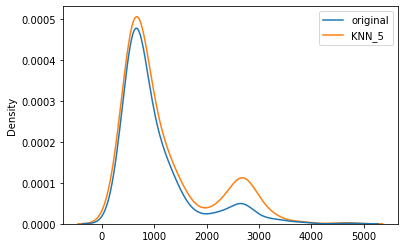

In [ ]:
sns.kdeplot(data = land_df)

In [ ]:
cols_to_delete_from_impute.append('row_num')

In [ ]:
data_final = pd.merge(data_cleaned[cols_to_delete_from_impute], knnimpute_data_imputed, on = 'row_num')
data_final.shape

(797, 21)

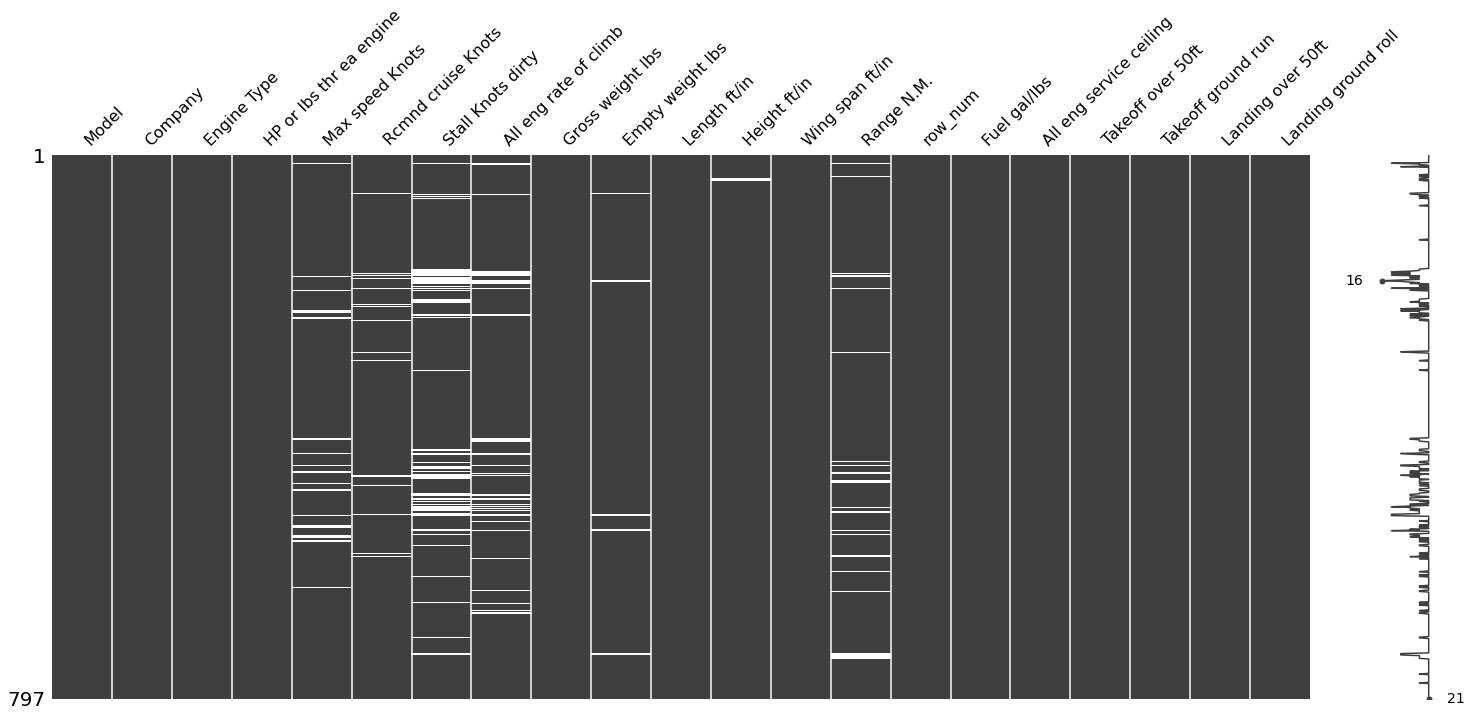

In [ ]:
msno.matrix(data_final)

In [ ]:
data_final = data_final.dropna(axis = 0, thresh = 21)

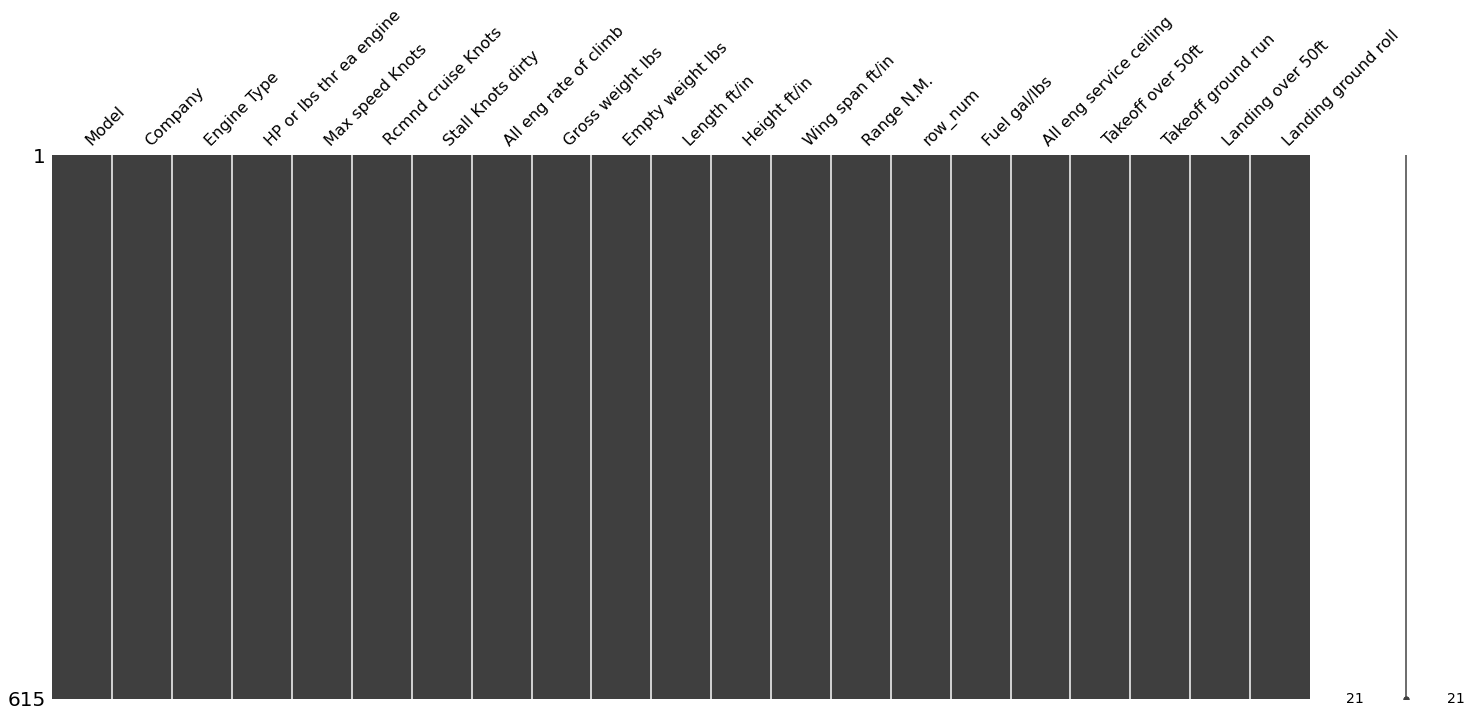

In [ ]:
msno.matrix(data_final)

# Кодирование категориальных признаков

In [ ]:
data_final['Range N.M.'].unique()

array(['370', '190', '210', '175', '180', '868', '1020', '1101', '1174',
       '1200', '148', '155', '226', '117', '174', '410', '400', '360',
       '715', '600', '404', '411', '248', '350', '261', '680', '530',
       '428', '503', '348', '275', '696', '257', '545', '563', '1806',
       '1720', '1972', '1870', '1080', '1000', '1005', '1235', '1290',
       '1120', '1185', '1160', '1270', '902', '656', '716', '746', '755',
       '630', '1010', '824', '622', '880', '638', '632', '787', '813',
       '670', '726', '733', '722', '1013', '1130', '1104', '1109', '737',
       '934', '550', '739', '763', '745', '661', '843', '957', '800',
       '720', '697', '510', '536', '580', '543', '535', '495', '492',
       '470', '513', '520', '717', '568', '647', '591', '704', '643',
       '565', '760', '483', '639', '452', '435', '2289', '1818', '1546',
       '1450', '1431', '1525', '1385', '1001', '730', '1100', '2300',
       '2600', '2027', '1970', '1960', '1900', '1613', '1300', '1485',
 

In [ ]:
data_final.isna().sum()

Model                      0
Company                    0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
All eng rate of climb      0
Gross weight lbs           0
Empty weight lbs           0
Length ft/in               0
Height ft/in               0
Wing span ft/in            0
Range N.M.                 0
row_num                    0
Fuel gal/lbs               0
All eng service ceiling    0
Takeoff over 50ft          0
Takeoff ground run         0
Landing over 50ft          0
Landing ground roll        0
dtype: int64

## Кодирование категорий целочисленными значениями

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data_final['Engine Type'])

In [ ]:
data_final['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'piston', 'Pistion', 'TSIO 520',
       'IO550', 'PT6A-35', 'PT6A-21'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
le.inverse_transform([0, 1, 2, 3])

array(['IO550', 'Jet', 'PT6A-21', 'PT6A-35'], dtype=object)

## Кодирование категорий наборами бинарных значений

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data_final[['Engine Type']])
cat_enc_ohe

<615x9 sparse matrix of type '<class 'numpy.float64'>'
	with 615 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
pd.get_dummies(data_final[['Engine Type']]).head()

,Engine Type_IO550,Engine Type_Jet,Engine Type_PT6A-21,Engine Type_PT6A-35,Engine Type_Pistion,Engine Type_Piston,Engine Type_Propjet,Engine Type_TSIO 520,Engine Type_piston
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


# Нормализация числовых признаков

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
cols_integer = []
cols_string = []
for col in data_final.columns:
  try:
    data_final[col] = data_final[col].astype(float)
    print(f'{col} : Success')
    cols_integer.append(col)
  except Exception as e:
    print(f'{col} : {repr(e)}')
    cols_string.append(col)
    continue

Model : ValueError("could not convert string to float: '15 AC Sedan'")
Company : ValueError("could not convert string to float: 'Aeronca'")
Engine Type : ValueError("could not convert string to float: 'Piston'")
HP or lbs thr ea engine : ValueError("could not convert string to float: '1000 dry'")
Max speed Knots : ValueError("could not convert string to float: '.85 Mach'")
Rcmnd cruise Knots : Success
Stall Knots dirty : Success
All eng rate of climb : ValueError("could not convert string to float: '1,030 w/3bld'")
Gross weight lbs : ValueError("could not convert string to float: 'Orig'")
Empty weight lbs : Success
Length ft/in : ValueError("could not convert string to float: '25/3'")
Height ft/in : ValueError("could not convert string to float: '10/3'")
Wing span ft/in : ValueError("could not convert string to float: '37/5'")
Range N.M. : Success
row_num : Success
Fuel gal/lbs : Success
All eng service ceiling : Success
Takeoff over 50ft : Success
Takeoff ground run : Success
Landing 

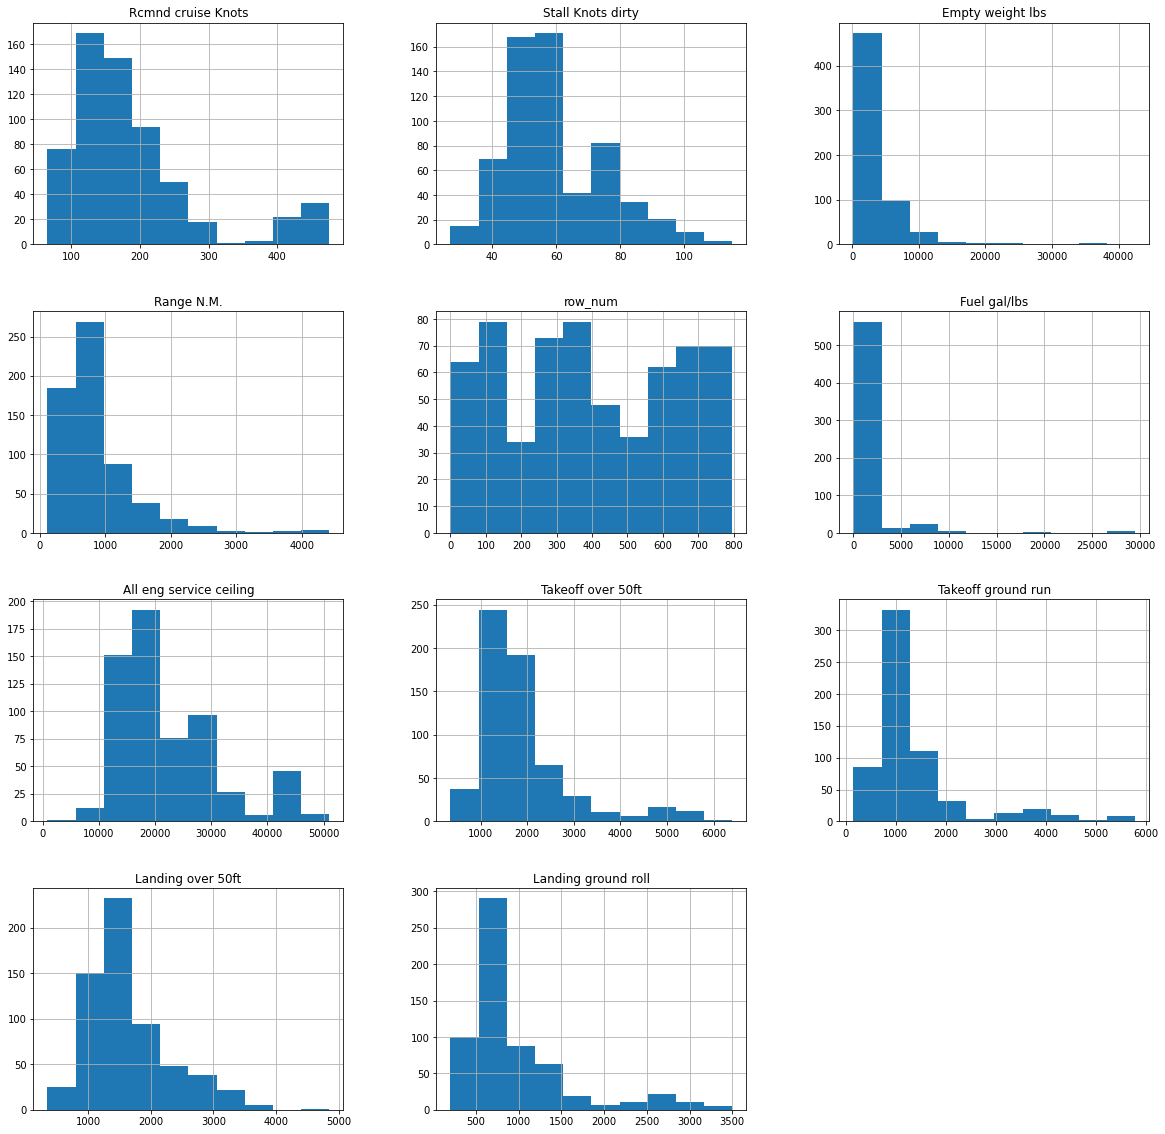

In [ ]:
data_final.hist(figsize=(20,20))
plt.show()

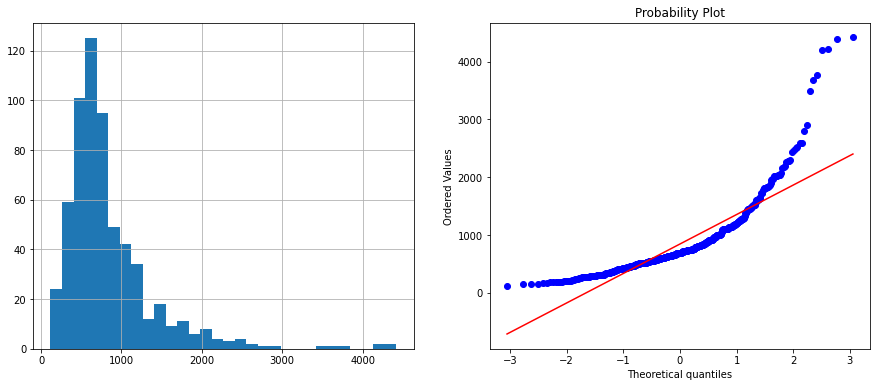

In [ ]:
diagnostic_plots(data_final, 'Range N.M.')

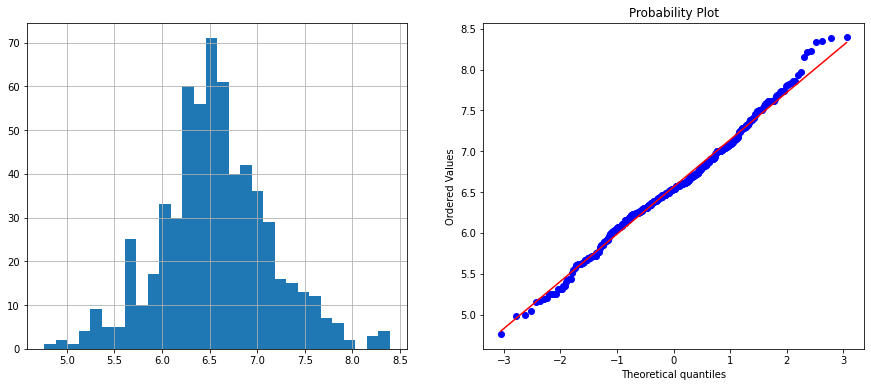

In [ ]:
#Логарифмическое преобразование
data_final['Range N.M._log'] = np.log(data_final['Range N.M.'])
diagnostic_plots(data_final, 'Range N.M._log')

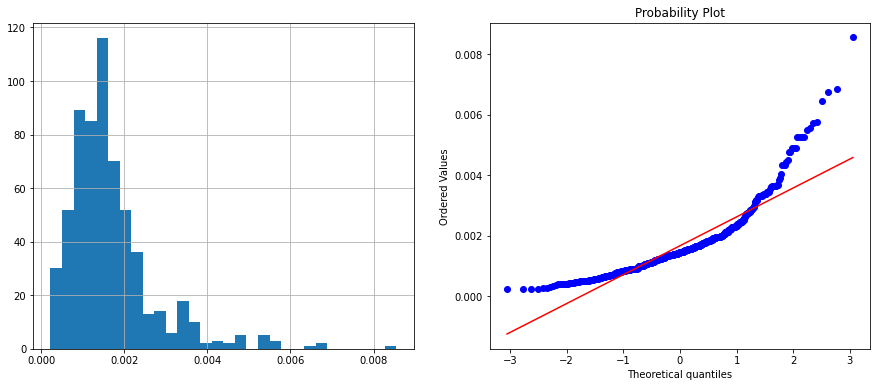

In [ ]:
#Обратное преобразование
data_final['Range N.M._reciprocal'] = 1 / (data_final['Range N.M.']) 
diagnostic_plots(data_final, 'Range N.M._reciprocal')

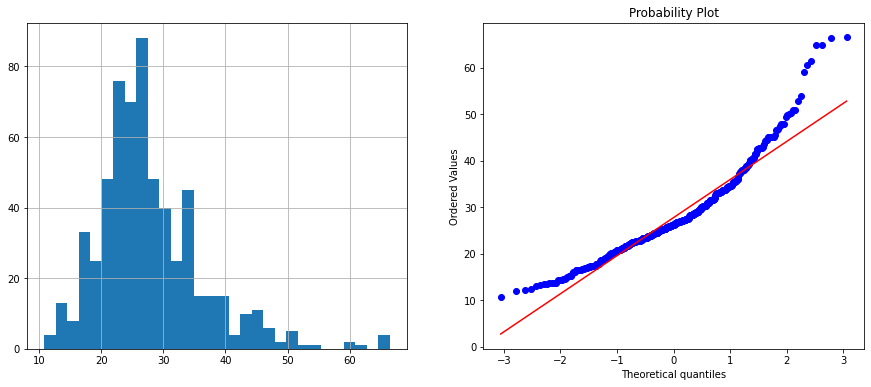

In [ ]:
#Квадратный корень
data_final['Range N.M._sqr'] = data_final['Range N.M.']**(1/2) 
diagnostic_plots(data_final, 'Range N.M._sqr')

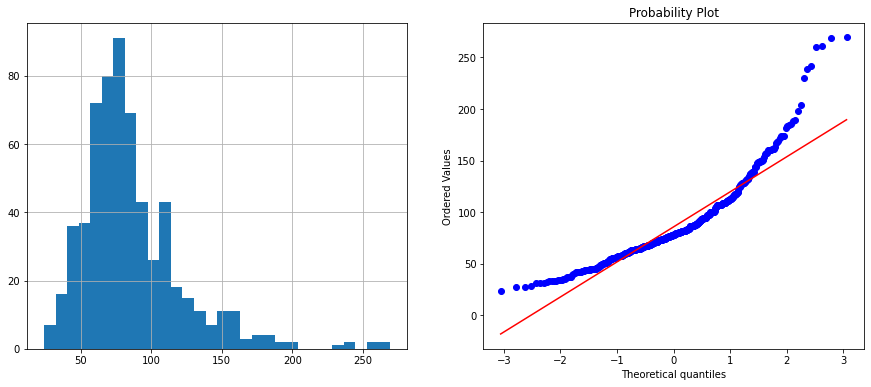

In [ ]:
#Возведение в степень
data_final['Range N.M._exp1'] = data_final['Range N.M.']**(1/1.5)
diagnostic_plots(data_final, 'Range N.M._exp1')

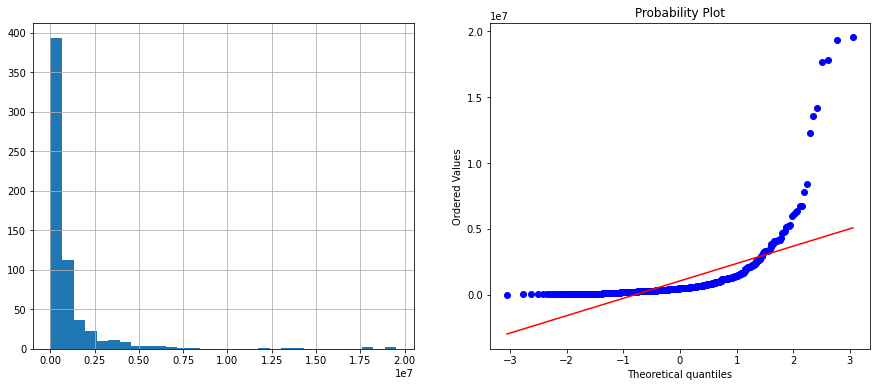

In [ ]:
data_final['Range N.M._exp2'] = data_final['Range N.M.']**(2)
diagnostic_plots(data_final, 'Range N.M._exp2')

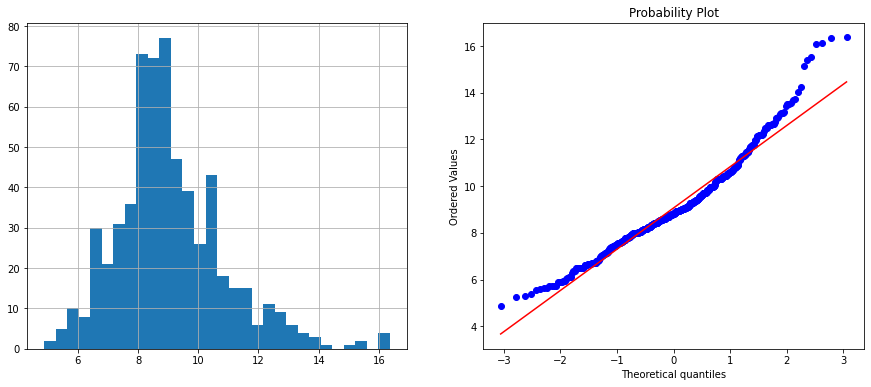

In [ ]:
data_final['Range N.M._exp3'] = data_final['Range N.M.']**(0.333)
diagnostic_plots(data_final, 'Range N.M._exp3')

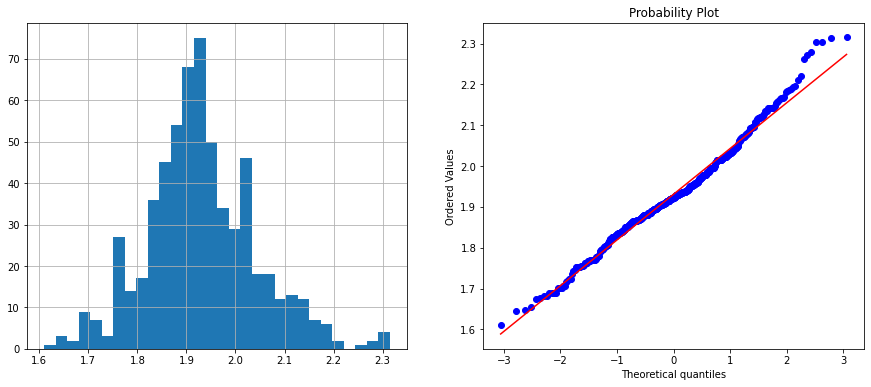

In [ ]:
data_final['Range N.M._exp4'] = data_final['Range N.M.']**(0.1)
diagnostic_plots(data_final, 'Range N.M._exp4')

Оптимальное значение λ = -0.07070159532603848


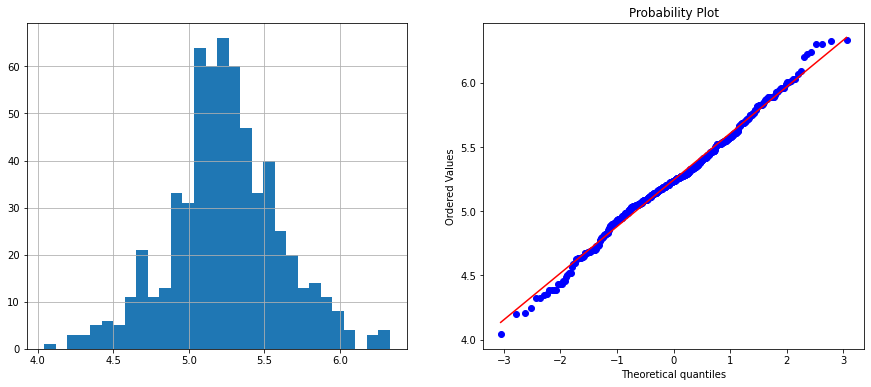

In [ ]:
#Преобразованиея Бокса-Кокса
data_final['Range N.M._boxcox'], param = stats.boxcox(data_final['Range N.M.']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_final, 'Range N.M._boxcox')

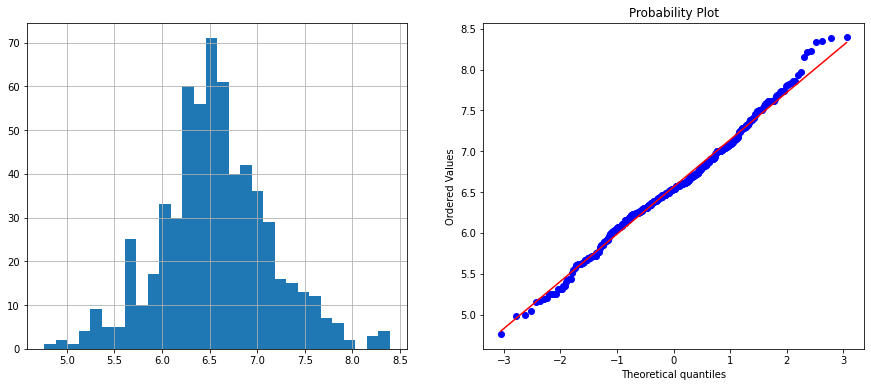

In [ ]:
# Для сравнения
diagnostic_plots(data_final, 'Range N.M._log')

In [ ]:
data_final.to_csv('cleaned_data_airplanes.csv', index = False)